<a href="https://colab.research.google.com/github/MakhamudDrame/Statistic/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats

Загрузка датасета


In [2]:
# Загрузка датасета diamonds
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
diamonds = pd.read_csv(url)

In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


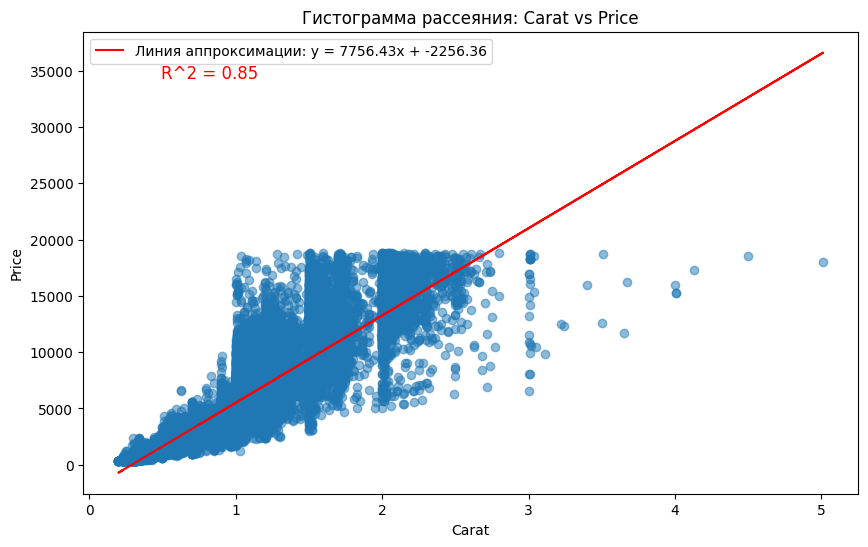

Величина достоверности аппроксимации R^2: 0.85


In [4]:
# Выберем две переменные для анализа,  carat и price
x = diamonds['carat']
y = diamonds['price']

# Построение гистограммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Гистограмма рассеяния: Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# Расчет линии аппроксимации и R^2
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept

# Построение линии аппроксимации
plt.plot(x, line, color='red', label=f'Линия аппроксимации: y = {slope:.2f}x + {intercept:.2f}')

# Добавление R^2 на график
plt.text(0.1, 0.9, f'R^2 = {r_value**2:.2f}', transform=plt.gca().transAxes, fontsize=12, color='red')

plt.legend()
plt.show()


print(f'Величина достоверности аппроксимации R^2: {r_value**2:.2f}')

Создание выборок
Случайная выборка

Создадим случайную выборку размером примерно 1/3 от общего количества наблюдений.

In [5]:

# Размер выборки
sample_size = int(diamonds.shape[0] / 3)

# Случайная выборка
random_sample = diamonds.sample(n=sample_size, random_state=42)

Для стратифицированной выборки мы будем использовать столбец cut, который содержит информацию о качестве огранки бриллианта (Fair, Good, Very Good, Premium, Ideal).

In [6]:
# Стратифицированная выборка
stratified_sample = diamonds.groupby('cut', group_keys=False).apply(lambda x: x.sample(frac=sample_size/diamonds.shape[0], random_state=42))

<ipython-input-6-19fedcd7f0dd>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = diamonds.groupby('cut', group_keys=False).apply(lambda x: x.sample(frac=sample_size/diamonds.shape[0], random_state=42))


Расчет средних значений и доверительных интервалов

Рассчитаем среднее значение для каждой выборки.

In [7]:
# Среднее значение для случайной выборки
mean_random_sample = random_sample['carat'].mean()

# Среднее значение для стратифицированной выборки
mean_stratified_sample = stratified_sample['carat'].mean()

print("Среднее значение для случайной выборки:")
print(mean_random_sample)

print("\nСреднее значение для стратифицированной выборки:")
print(mean_stratified_sample)

Среднее значение для случайной выборки:
0.7943704115684093

Среднее значение для стратифицированной выборки:
0.8028426028921024


Доверительные интервалы

Ррассчитаем доверительные интервалы для средних значений на уровнях доверия 90%, 95% и 99%.

In [8]:
# Функция для расчета доверительного интервала
def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

# 2. Доверительные интервалы для среднего
random_ci_90 = confidence_interval(random_sample['carat'], confidence=0.90)
random_ci_95 = confidence_interval(random_sample['carat'], confidence=0.95)
random_ci_99 = confidence_interval(random_sample['carat'], confidence=0.99)

stratified_ci_90 = confidence_interval(stratified_sample['carat'], confidence=0.90)
stratified_ci_95 = confidence_interval(stratified_sample['carat'], confidence=0.95)
stratified_ci_99 = confidence_interval(stratified_sample['carat'], confidence=0.99)

print("\nДоверительные интервалы для случайной выборки:")
print(f"90%: ({random_ci_90[1]:.2f}, {random_ci_90[2]:.2f})")
print(f"95%: ({random_ci_95[1]:.2f}, {random_ci_95[2]:.2f})")
print(f"99%: ({random_ci_99[1]:.2f}, {random_ci_99[2]:.2f})")

print("\nДоверительные интервалы для стратифицированной выборки:")
print(f"90%: ({stratified_ci_90[1]:.2f}, {stratified_ci_90[2]:.2f})")
print(f"95%: ({stratified_ci_95[1]:.2f}, {stratified_ci_95[2]:.2f})")
print(f"99%: ({stratified_ci_99[1]:.2f}, {stratified_ci_99[2]:.2f})")



Доверительные интервалы для случайной выборки:
90%: (0.79, 0.80)
95%: (0.79, 0.80)
99%: (0.79, 0.80)

Доверительные интервалы для стратифицированной выборки:
90%: (0.80, 0.81)
95%: (0.80, 0.81)
99%: (0.79, 0.81)


Сравнение средних значений и доверительных интервалов

Сравним средние значения выборок с генеральной совокупностью и границами доверительных интервалов.

In [9]:
# Среднее значение генеральной совокупности
mean_population = diamonds['carat'].mean()

print("\nСреднее значение генеральной совокупности:")
print(mean_population)

# Сравнение средних значений
print("\nСравнение средних значений:")
print(f"Среднее случайной выборки vs генеральная совокупность: {mean_random_sample - mean_population}")
print(f"Среднее стратифицированной выборки vs генеральная совокупность: {mean_stratified_sample - mean_population}")

# Сравнение с границами доверительных интервалов
print("\nСравнение с границами доверительных интервалов:")
print(f"95% доверительный интервал случайной выборки: {random_ci_95[1]} - {random_ci_95[2]}")
print(f"95% доверительный интервал стратифицированной выборки: {stratified_ci_95[1]} - {stratified_ci_95[2]}")


Среднее значение генеральной совокупности:
0.7979397478680014

Сравнение средних значений:
Среднее случайной выборки vs генеральная совокупность: -0.0035693362995921074
Среднее стратифицированной выборки vs генеральная совокупность: 0.004902855024101038

Сравнение с границами доверительных интервалов:
95% доверительный интервал случайной выборки: 0.7874827467230088 - 0.8012580764138097
95% доверительный интервал стратифицированной выборки: 0.7958843986350821 - 0.8098008071491227
